<div style="border:solid green 2px; padding: 20px">
    
<b>Вадим, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделала большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример:
    
![image.png](attachment:image.png)
</div>

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd # Импорт библиотеки Пандас
import matplotlib.pyplot as plt # Импорт библиотеки Матплотлиб
import numpy as np # Импорт библиотеки Нампай
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # Открываем файл real_estate_data и присваиваем его data

In [ ]:
#Выводим первые 5 строк на экран
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
#Выводим основную инфу
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
#Выводим последние 5 строк на экран
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


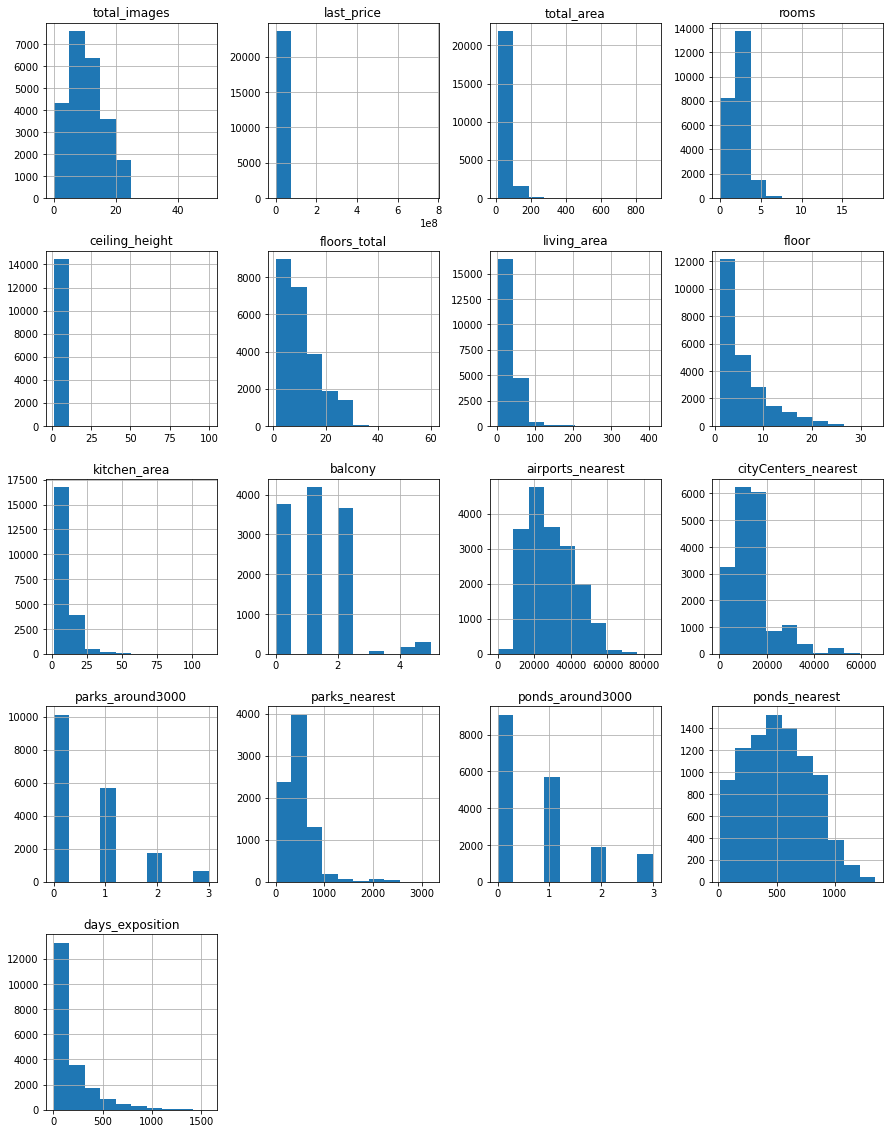

In [ ]:
#Выводим гистограммы
data.hist(figsize=(15, 20));

Похоже , что гистограммы  соответствуют нормальному распределению

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть

### Предобработка данных

In [ ]:
# Выводим количество пропущенных значений для каждого столбца
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Красиво)

In [ ]:
#Столбец first_day_exposition необходимо привести к  datetime для удобства работы далее
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
#Столбец "is_apartment" заполним значением "False" вместо пропущенных значений
data.is_apartment.fillna(False, inplace=True)
data.is_apartment = data.is_apartment.astype('bool')

In [ ]:
# Столбец "last_price" приводим в целочисленный тип
data['last_price'] = data['last_price'].astype(int)

In [ ]:
# Столбец 'balcony' приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

In [ ]:
# Посмотрим столбец с высотой потолков
data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

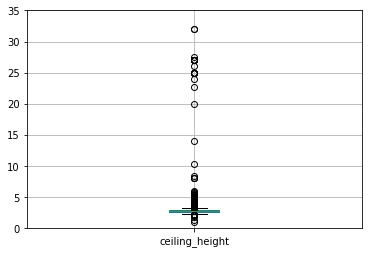

In [ ]:
#Посмотрим как на диаграмме выглядит распределение  с высотой потолков
data.boxplot(column='ceiling_height')
plt.ylim(0, 35);

In [ ]:
# Исходя из диаграммы можно отсечь нестандартные значения выше 20, приведем к медианным значениям
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10
data.ceiling_height.fillna(data['ceiling_height'].mean(), inplace=True)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что не хардкодишь, а используешь условие

In [ ]:
#Можно заметить очень выраженную корреляцию в значениях общей площади и жилой площади
data[['total_area', 'living_area']].corr()

,total_area,living_area
total_area,1.000000,0.939537
living_area,0.939537,1.000000


In [ ]:
#Заполним пропуски жилой площади значениями, соответствующими общей:
data.living_area = data.living_area.fillna(data.groupby(pd.qcut(data.total_area, 50)).living_area.transform('median'))

In [ ]:
#Из квартилей общей, жилой и площади кухни, можно заметить,
#что общая площадь примерно равна сумме жилой площади и кухни, помноженной на 2,5:
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23699.000000,23699.000000,21421.000000
mean,60.348651,34.560621,10.569807
std,35.654083,21.928828,5.905438
min,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.900000,42.300000,12.000000
max,900.000000,409.700000,112.000000


In [ ]:
#Заменим пропуски соответствующими значениями:
data.kitchen_area = data.kitchen_area.fillna((data.total_area - data.living_area)/2.5)

In [ ]:
#Как можем заметить, квартили площади кухни изменилось незначительно,
#значит, новые значения не будут искажать статистику:
data.kitchen_area.describe()

count    23699.000000
mean        10.464856
std          6.278529
min         -1.580000
25%          7.000000
50%          9.000000
75%         11.900000
max        151.360000
Name: kitchen_area, dtype: float64

In [ ]:
# Некоторые пропуски можно удалить, например этажность домов
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data.floors_total.astype('int')

In [ ]:
# Пропуски в обозначении локации также удалим
data.dropna(subset=['locality_name'], inplace=True)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верно, если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время

In [ ]:
# Посмотрим инфу в обновленной таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [ ]:
# Настало время удаления дубликатов
# выведем уникальные значения
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# Проверим количество уникальных значений
len(data.locality_name.unique())

364

In [ ]:
# Поменяем все "ё" на "е"
data.locality_name = data.locality_name.str.replace('ё', 'е')
# Создадим переменную, которая будет содержать "неудобные" слова
inconvenient_values = ['поселок', 'городской', 'городского',
              'деревня', 'типа', 'садовое', 'товарищество',
              'село', 'имени', 'станции', 'садоводческое',
              'некоммерческое', 'при', 'железнодорожной']
# Заменим значения на пустые строки
for i in inconvenient_values:
    data.locality_name = data.locality_name.replace({i: ''}, regex=True)
# Удалим лишние пробелы в начале и конце строк
data.locality_name = data.locality_name.str.strip()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код

In [ ]:
# Cнова проверим уникальные значения
data.locality_name.unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [ ]:
# И снова проверим количество уникальных значений
len(data.locality_name.unique())

306

0

In [ ]:
#Проверка на явные дубликаты
data[data.duplicated() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [ ]:
#Дополнительная проверка на количествно явных дубликатов
data.duplicated().sum()

0

Явных дубликатов нету. Но если бы они были, я бы их удалил с помощью "data = data.drop_duplicates().reset_index(drop=True)" и проверила бы еще раз через "data.duplicated().sum()"

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Хорошо. Проверка на дубликаты - основа предобработки данных
</div>

In [ ]:
#Поиск и удаление аномальных значений
#Рассмотрим столбец total_area

In [ ]:
data.boxplot(column='total_area');

In [ ]:
#Удалим значения, площадь которых более 200 метров
data = data.query('total_area <= 200')

In [ ]:
#Рассмотрим столбец last_price
data.boxplot(column='last_price')
plt.ylim(0, 20000000);

In [ ]:
#Удалим значения, которые на гистограмме оказались близки к нулю, начиная с отметки 20млн
data = data.query('last_price <= 20000000')

In [ ]:
#Рассмотрим столбец rooms
data.boxplot(column='rooms')

In [ ]:
#Удалим значения более 6
data = data.query('rooms <= 6')

In [ ]:
#Рассмотрим столбец ceiling_height
data.boxplot(column='ceiling_height')

In [ ]:
#Построим гистограмму
data.ceiling_height.hist(range=(0, 6), bins=30);

In [ ]:
data = data.query('ceiling_height <= 4 and ceiling_height >= 2.4')

In [ ]:
#Рассмотрим столбец floors_total
data.boxplot(column='floors_total')

In [ ]:
#Построим гистограмму
data.floors_total.hist(range=(0, 40), bins=20)

In [ ]:
#Удалим значения больше 31
data = data.query('floors_total < 31')

In [ ]:
#Рассмотрим столбец living_area
data.boxplot(column='living_area')

In [ ]:
#Построим гистограмму
data.living_area.hist(range=(0, 200), bins=30)

In [ ]:
#Удалим значения более 100
data = data.query('living_area <= 100')

In [ ]:
#Рассмотрим столбец floor
data.boxplot(column='floor')

In [ ]:
#Ранее мы удалили максимальную этажность более 32, здесь будем придерживаться той же цифры
data = data.query('floor <= 32')

In [ ]:
#Рассмотрим столбец kitchen_area
data.boxplot(column='kitchen_area')

In [ ]:
#Построим гистограмму
data.kitchen_area.hist(range=(0, 60), bins=30)

In [ ]:
#Удалим значения более 25
data = data.query('kitchen_area <= 25')

In [ ]:
#Рассмотрим столбец balcony
data.boxplot(column='balcony')

In [ ]:
#Построим гистограмму
data.balcony.hist(range=(0, 6), bins=30)

In [ ]:
#Удалим значения больше 3
data = data.query('balcony <= 3')

In [ ]:
# Проверим еще раз инфу
data.info()

Вывод
Практически во всех числовых столбцах были значения, выходящие за пределы нормальных значений. Как правило, их количество составляло от 500 до 2000 строк.

Чтобы не было больших потерь данных, я приняла решение сверять распределение по гистограммам соответствующих столбцов, а в качестве предельных значений выбирать усредненное значение.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Вадим, не увидел проверки на явные дубликаты. (Это когда одна строка датасета на 100% схожа с другой, другми строками)
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует проверка на явные дубликаты, поправишь, пожалуйста?
    
---
    
Так же отсутствует вывод после раздела (можно описать качество исходных данных). Поправишь, этот момент в проекте?
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
# Цена квадратного метра жилья:
data['square_meter'] = data['last_price']/data['total_area']
data['square_meter'] = data['square_meter'].astype('int')
data.head()

In [ ]:
data['square_meter'].mean().round(1)

 Вывод: квартиры в среднем стоят около 100к за квадрат в общей массе

In [ ]:
# Добавим в таблицу день недели, месяц и год публикации объявления
data['day_of_week']= data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['years']=data['first_day_exposition'].dt.year
data.head()

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex.
    
Вот хорошая статья на этот счёт:
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]')
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

In [ ]:
data['years'].value_counts()

Количество предложений на рынке недвижимости было лучше значением в 2017 и 2018 годах, а вот в 2019 количество предложений сократилось в 4 раза и вернулось на уровень 2016 года

In [ ]:
# Тип этажа:
data['floor_type'] = ''
data['floor_type'] = np.where(data['floor'] == data['floors_total'], 'последний', 'другой')
data['floor_type'] = data['floor_type'].where(data['floor'] != 1, 'первый')
data[['floor', 'floors_total', 'floor_type']]

In [ ]:
data['city_km'] = data.cityCenters_nearest // 1000
data[['cityCenters_nearest', 'city_km']]

Выводы:
Жилье активнее начало продаваться с 2017 года,
Cредняя цена за кв.метр равна 100 тыс.руб.
Первые и последние этажи в сумме по количеству объявлений уступают любому другому больше,
чем в три раза от всего количества объявлений.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

In [ ]:
data.describe()

In [ ]:
# Общая площадь
data.total_area.hist(bins=20)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

In [ ]:
data.total_area.describe()

Гистограмма распределена нормально, самое большое количество значений находится в области 30-50 кв.м.

Среднее арифметическое 54м, медиана 50м.

In [ ]:
#Рассмотрим жилую площадь
data.living_area.hist(bins=30)

In [ ]:
data.living_area.describe()

Гистограмма распределена практически нормально, есть просадка в значениях 20-25м. Мода в области 15-30м.

Среднее арифметическое 31м, медиана 30м.

In [ ]:
#Рассмотрим площадь кухни
data.kitchen_area.hist(bins=20)

In [ ]:
data.kitchen_area.describe()

Гистограмма распределена нормально.
Среднее арифметическое 10м, медиана 9м.

In [ ]:
#Рассмотрим цену объекта
data.last_price.hist(bins=30)

In [ ]:
data.last_price.describe()

Гистограмма распределена нормально. Мода в области 3-5млн.

Среднее арифметическое 5млн, медиана 5млн.

In [ ]:
#Рассмотрим количество комнат
data.rooms.hist(bins=13);

In [ ]:
data.rooms.describe()

Гистограмма распределена нормально. Мода в области 1-2 комнат.

Среднее арифметическое 2 комнаты, медиана 2 комнаты.

In [ ]:
#Рассмотрим высоту потолков
data.ceiling_height.hist(bins=10)

In [ ]:
data.ceiling_height.describe()

Большая часть значений оказалась в диапазоне 2,5 - 2,8м, что обусловлено большим количеством пропусков,
заполненных медианным значением.
Впрочем, данная высота и правда является стандартной в большинстве квартир

In [ ]:
#Рассмотрим этаж квартиры
data.floor.hist(bins=27)

In [ ]:
data.floor.describe()

Гистограмма распределена нормально. Мода в области 1-5 этажа.

Среднее арифметическое 5 этажей, медиана 4 этажа.

In [ ]:
#Рассмотрим тип этажа квартиры
data.floor_type.hist(bins=5, figsize=(4, 4));

In [ ]:
data.floor_type.value_counts()

Можно заметить, что большинство квартир находится "в середине" - не первый и не последний этаж.
А вот число квартир на перовм и последнем этажах практически равно

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Оставлю общий комментарий по проекту. Давай все выводы и ходы действий перенесем в обычную ячейку markdown. Комментировать стоит лишь сам код
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Спасибо за правки. Так лучше
</div>

In [ ]:
#Рассмотрим общее количество этажей в доме
data.floors_total.hist(bins=30)

In [ ]:
data.floors_total.describe()

Общее очертание гистограммы нормальное.

Среднее арифметическое 11 этажей, медиана 9 этажей.

In [ ]:
#Рассмотрим расстояние до центра города
data.cityCenters_nearest.hist(bins=30);

In [ ]:
data.cityCenters_nearest.describe()

Общее очертание гистограммы практически нормально

Среднее арифметическое 15км, медиана 13км.

In [ ]:
#Рассмотрим расстояние до ближайшего аэропорта
data.airports_nearest.hist(bins=30)

In [ ]:
data.airports_nearest.describe()

Гистограмма распределена нормально, наблюдается минимальое количество жилья в радиусе 5км от аэропорта.
Мода в области 10-30км.

Среднее арифметическое 29км, медиана 27км.

In [ ]:
#Рассмотрим расстояние до ближайшего парка
data.parks_nearest.hist(bins=30)

In [ ]:
data.parks_nearest.describe()

Гистограмма распределена практически нормально, наблюдается просадка в области более 1км, т.е.
практически всегда в радиусе 1км от жилья находится хотябы 1 парк. Мода в области 300-600м.
Среднее арифметическое 500м, медиана 450м.

In [ ]:
#Рассмотрим день публикации объявления
data.day_of_week.hist(bins=13, figsize=(5, 5))

In [ ]:
data.day_of_week.value_counts()

Похоже, что объявления публикуются в будни, и очевидно реже по выходным

In [ ]:
#Рассмотрим месяц публикации объявления
data.month.hist(bins=24)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

In [ ]:
data.pivot_table(index='month', values='day_of_week', aggfunc='count')

In [ ]:
#Похоже, что активная фаза в феврале-апреле, а также в сентябре-ноябре. Меньше всего объявлений можно увидеть в январе и апреле

In [ ]:
#Раcсмотрим скорость продажи квартиры
data.days_exposition.hist(bins=200, figsize=(15, 5), range=(0, 200))

Исходя из графика можно сделать вывод, что  большинство квартир продаются довольно быстро, самое большое приходится на значения до 70 дней.
Далее, чем больше проходит дней, тем меньшее количество продаж.

Обнаружены выбросы в зоне 45 и 60 дней, многократно превышающие окружающие значения
Возможно, объявление было снято по причине окончания срока действия

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Тут важно порассуждать как аналитик, почему именно 45 и 60 дней? С чем это связано?

</div>

In [ ]:
data.days_exposition.describe()

Быстрыми продажами следует считать продажи, занявшие до 44 дней. Медленными же будут продажи более 223 дней

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, до 1.5 месяцев можно назвать быстрой продажей
</div>

Вывод

В ходе исследования было выявлено, что большинство квартир имеют:

-общую площадь 30-50кв.м.
-жилую площадь 15-30м
-площадь кухни 5-10м
-цену 3-5млн
-1-2 комнаты
-высоту потолков 2,5-2,8м

Квартиры находятся:

-на 1-5 этажах
-между первым и последним этажами
-в 5-10 этажных зданиях
-в 12-15км от центра города
-в 10-30км от аэропорта
-в 300-600м от парка

Объявления чаще публикуются в будни, весной и осенью

In [ ]:
#Расcмотрим, какие факторы больше всего влияют на стоимость

In [ ]:
#Общая площадь
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что зависимость переменных рассматриваешь через тип графика scatter
</div>

In [ ]:
data['last_price'].corr(data['total_area'])

Как мы можем видеть по графику, существует прямая зависимость между ценой и общей площадью. Численно корреляция равна 0,65

In [ ]:
#Жилая площадь
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)

In [ ]:
data['last_price'].corr(data['living_area'])

Как мы можем видеть по графику, также существует прямая зависимость между ценой и жилой площадью,
но уже менее выраженно. Численно корреляция равна 0,59

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

In [ ]:
#Площадь кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)

In [ ]:
data['last_price'].corr(data['kitchen_area'])

Как мы можем видеть по графику, также существует прямая зависимость между ценой и площадью кухни, но еще менее выраженно. Численно корреляция равна 0,51

In [ ]:
#Количество комнат
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar', legend=False);
plt.ylabel('last_price')

In [ ]:
data['last_price'].corr(data['rooms'])

Несмотря на аномальное значение,  мы можем видеть по графику, существует прямая зависимость между ценой и количеством комнат.
Чем больше комнат, тем выше стоимость. Численно корреляция равна 0,36

In [ ]:
#Тип этажа
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar', legend=False, figsize=(3, 4));
plt.ylabel('last_price');

In [ ]:
#data['last_price'].corr(data['kitchen_area']) // Неправильно сделала

Как мы можем видеть по графику, также существует прямая зависимость между ценой и типом этажа.
В среднем, дешевле всего получается первый этаж, далее последний, а самыми дорогими обычно являются квартиры посередине.


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Тут не стоит считать корреляцию (т.к. это категоральный столбец) + ты считаешь по кухне, а рассматриваем тип этажа
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

In [ ]:
#День недели, месяц и год
data.pivot_table(index='day_of_week', values='last_price', aggfunc='median').plot(kind='bar', legend=False);
plt.ylabel('last_price')

In [ ]:
data['last_price'].corr(data['day_of_week'])

Как мы можем видеть по графику, корреляция цены к дню публикации практически равна нулю.

In [ ]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(kind='bar', legend=False);
plt.ylabel('last_price')

In [ ]:
#data['last_price'].corr(data['month'])

Как мы можем видеть по графику, корреляция цены к месяцу публикации также практически равна нулю.

In [ ]:
data.pivot_table(index='years', values='last_price', aggfunc='median').plot(kind='bar', legend=False);
plt.ylabel('last_price')

In [ ]:
#Как мы можем видеть по графикам, медианные цены на квартиры падали с 2014 по 2017 года, однако далее,
#в 2018 и 2019 годах, начали расти

In [ ]:
data.pivot_table(index='years', values='total_area', aggfunc='median').plot(kind='bar', legend=False);
plt.ylabel('total_area')

Как мы видим из графика соотношения площадей квартир по годам, площади также падали в диапазоне 2014-2017 годов.
Однако в 2017-2019 годах роста площадей не было замечено, в отличие от роста цен.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный инсайд для заказчика!) Молодец
</div>

Выводы:

Стало понятно, что сильнее всего на стоимость влияют:
-площадь
-количество комнат
-тип этажа
-год публикации
-день и месяц публикации практически не влияют на стоиомость

Изменение тенденций в годах:
-с 2014 по 2017 наблюдается уменьшение площадей продаваемых квартир
-с 2017 по 2019 наблюдается небольшое повышение цен

In [ ]:
#Средняя цена 1 кв.м. в топ 10 городах
(
    data
    .pivot_table(index='locality_name', values='square_meter', aggfunc=('count', 'median'))
    .sort_values(by='count', ascending=False).head(10)
)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

Как можно увидеть по сводной табице, самая высокая цена 1 квадратного метра в г. Санкт-Петербург, со значением 104т.р.

Далее идут Мурино и Кудрово со стоимостью 86т.р. и 96т.р. соответственно

Замыкают топ объявлений Гатчина и Выборг со стоиомстю 68т.р. и 58т.р. за 1кв.м.

In [ ]:
#Средняя цена километра удаленности от центра
#Cоздадим новую таблицу, куда сохраним необходимые данные
km = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_km', values='last_price', aggfunc=['count', 'sum'])
)

In [ ]:
#Cоздадим новый столбец со средней ценой каждого километра
km['price'] = km['sum'] / km['count']
#Обнулим индексы
km = km.reset_index()

In [ ]:
#Посмотрим первые 5 строк
km.head()

In [ ]:
#Создадим столбчатую диаграмму
km.plot(x='city_km', y='price', kind='bar', legend=False, figsize=(10, 5), title = 'Средняя цена километра удаленности от центра г.Санкт-Петербург');
plt.xlabel('Километраж');
plt.ylabel('Расценки');

Чем дальше от центра Питера, тем цена каждого следующего километра снижается. Выбросы 20.0 и 27.0-28.0 могут намекать на жилье богатых и успешных

Вывод:

Самые дорогие квартиры находятся в г.Санкт-Петербург
Чем дальше квартира от центра, тем ниже ее стоимость

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по шагу брифа 4.5
    
Давай сделаем проект сильнее, и сделаем сводную таблицу (удалённость в км от центра Питера, и средняя цена на этом км). И уже по этой сводной таблице построим линейную или столбчатую диграмму для визуализации динамики цены относительно удалённости
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

### Общий вывод

#В ходе исследования было выявлено, что большинство квартир имеют схожие характеристики:

Oбщая площадь 30-50кв.м.;
Цена 3-5млн;
1-2 комнаты;
Такие квартиры обычно находятся в срединных этажах 5-10 этажных зданий, в радиусе 300-600м которых есть парки.

Изменение тенденций в годах:
с 2014 по 2017 наблюдается уменьшение площадей продаваемых квартир;
с 2017 по 2019 наблюдается небольшое повышение цен;

Были выявлены факторы, влияющие на стоимость квартиры:
Чем больше площадь, тем выше стоимость;
Чем больше количество комнат, тем выше стоимость;
Квартиры первых и последних этажей стоят дешевле, срединных этажей - дороже;
Cамые дорогие квартиры находятся в г. Санкт-Петербург;
Чем ближе квартира к центру города, тем выше ее стоимость;

Все эти парамаетры напрямую влияют на образование стоимости квартиры

В дальнейшем, результаты этого исследования могут стать системой, которая, учитывая все эти факторы одновременно, сможет прогнозировать цену для любой квартиры, принадлежащей к любому сочетанию рассмотренных свойств.

В ходе исследования было выявлено большое количество пропусков в геоданных. Природа этих пропусков не ясна, возможно сбои при копировании/чтении данных

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно.
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b>



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять.

---

Нужно поправить:

1) Оформление проекта

2) Проверка на дубликаты

3) В последнем шаге добавить линейную или столбчатую диаграмму

4) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

5) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №2 </b>



Отличная работа, осталось поправить один момент:

---

Нужно поправить:


1) Проверка на дубликаты


----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №3__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод